In [15]:
pip install requests pandas matplotlib seaborn folium geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium  # For geospatial visualization
import numpy as np

In [7]:
# Step 1: Replace with your OpenWeatherMap API key
api_key = "9b2c72bec82d707513240e74767a8861"

In [9]:
# Step 2: Specify location for weather data retrieval
location = "San Francisco"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={api_key}&units=metric"

In [10]:
# Step 3: Retrieve data from OpenWeatherMap API
response = requests.get(url)
weather_data = response.json()

In [11]:
print(weather_data)  # Check the actual API response to understand what went wrong

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1731304800, 'main': {'temp': 13.91, 'feels_like': 13.42, 'temp_min': 13.91, 'temp_max': 14, 'pressure': 1017, 'sea_level': 1017, 'grnd_level': 1015, 'humidity': 79, 'temp_kf': -0.09}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'clouds': {'all': 47}, 'wind': {'speed': 2.38, 'deg': 173, 'gust': 3.67}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-11-11 06:00:00'}, {'dt': 1731315600, 'main': {'temp': 13.83, 'feels_like': 13.36, 'temp_min': 13.82, 'temp_max': 13.83, 'pressure': 1016, 'sea_level': 1016, 'grnd_level': 1014, 'humidity': 80, 'temp_kf': 0.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'clouds': {'all': 67}, 'wind': {'speed': 2.59, 'deg': 164, 'gust': 4.54}, 'visibility': 10000, 'pop': 0.03, 'sys': {'pod': 'n'}, 'dt_txt': '2024-11-11 09:00:00'}, {'dt': 1731326400, 'main': {'temp': 13.92, 'feels_like': 13

In [12]:
if 'list' in weather_data:
    weather_list = weather_data['list']
    extracted_data = []

    for entry in weather_list:
        extracted_data.append({
            "datetime": datetime.fromtimestamp(entry["dt"]),
            "temperature": entry["main"]["temp"],
            "humidity": entry["main"]["humidity"],
            "wind_speed": entry["wind"]["speed"],
            "precipitation": entry.get("rain", {}).get("3h", 0),  # 3-hour precipitation, default to 0 if not available
            "lat": weather_data["city"]["coord"]["lat"],
            "lon": weather_data["city"]["coord"]["lon"]
        })
else:
    print("Error in API response:", weather_data.get("message", "Unknown error"))


In [13]:
# Step 5: Create DataFrame and clean data
df = pd.DataFrame(extracted_data)

In [14]:
# Handle missing values by filling with mean (if any)
df.fillna(df.mean(), inplace=True)

In [15]:
# Step 6: Perform data modeling and basic analysis
# Calculating average temperature and humidity over the entire period
avg_temp = df['temperature'].mean()
avg_humidity = df['humidity'].mean()

In [16]:
# Calculating maximum and minimum values
max_temp = df['temperature'].max()
min_temp = df['temperature'].min()
max_wind_speed = df['wind_speed'].max()

In [17]:
print(f"Average Temperature: {avg_temp:.2f}°C")
print(f"Maximum Temperature: {max_temp}°C")
print(f"Minimum Temperature: {min_temp}°C")
print(f"Maximum Wind Speed: {max_wind_speed} m/s")

Average Temperature: 12.48°C
Maximum Temperature: 14.5°C
Minimum Temperature: 9.96°C
Maximum Wind Speed: 9.68 m/s


In [18]:
# Step 7: Data Aggregation for daily summaries
df['date'] = df['datetime'].dt.date
daily_summary = df.groupby('date').agg({
    'temperature': ['mean', 'max', 'min'],
    'humidity': 'mean',
    'wind_speed': 'mean',
    'precipitation': 'sum'
}).reset_index()

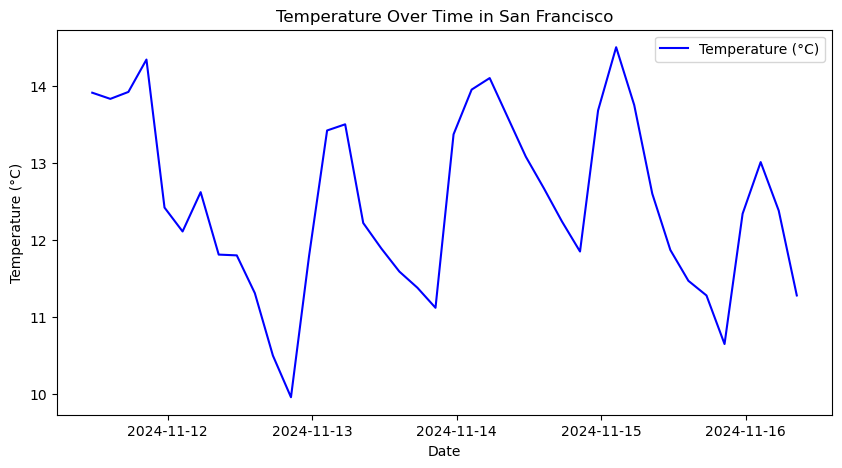

In [19]:
# Step 8: Visualization

# Line Plot for Temperature over time
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['temperature'], color='blue', label='Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title(f"Temperature Over Time in {location}")
plt.legend()
plt.show()

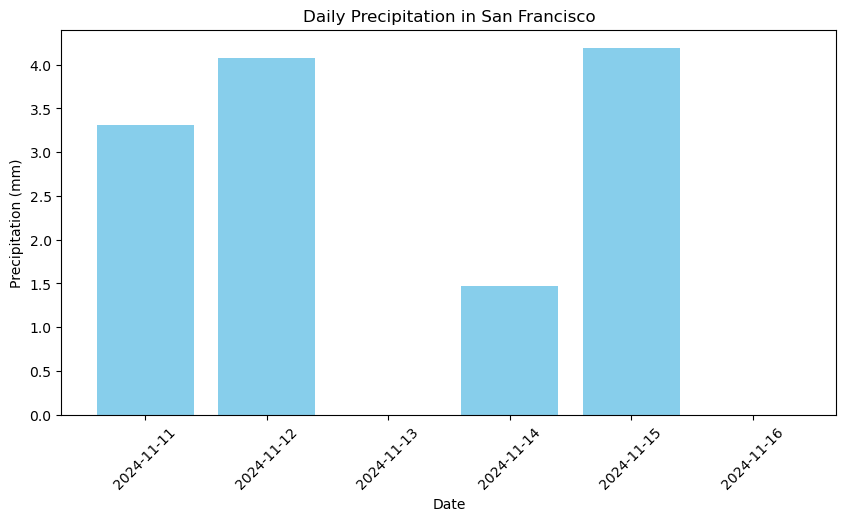

In [20]:
# Bar Plot for Daily Precipitation
plt.figure(figsize=(10, 5))
plt.bar(daily_summary['date'], daily_summary['precipitation']['sum'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title(f"Daily Precipitation in {location}")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Step 9: Geospatial Visualization of Location
map = folium.Map(location=[df['lat'][0], df['lon'][0]], zoom_start=10)
folium.Marker([df['lat'][0], df['lon'][0]], popup=location).add_to(map)
map

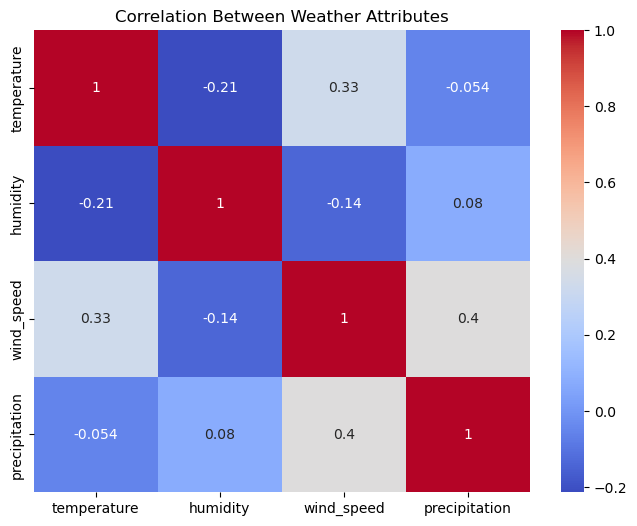

In [22]:
# Step 10: Correlation Plot between weather attributes
plt.figure(figsize=(8, 6))
sns.heatmap(df[['temperature', 'humidity', 'wind_speed', 'precipitation']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather Attributes")
plt.show()

Explanation of Each Task

API Key Registration: You need to replace YOUR_API_KEY with your actual OpenWeatherMap API key.

Data Retrieval: A forecast endpoint is used here, which returns 3-hour interval data for up to 5 days.

Data Extraction: We extract temperature, humidity, wind speed, and precipitation data along with coordinates.

Data Cleaning: Missing values are handled by filling them with the mean of the column.

Data Modeling: Basic calculations, including average, maximum, and minimum values, give insights into the weather patterns.

Visualization:
Line Chart for temperature over time.
Bar Chart for daily precipitation totals.

Data Aggregation: Daily statistics are calculated for average temperature, humidity, and total precipitation.

Geospatial Visualization: Displays the location of the city on a map using folium.

Correlation Analysis: Correlation heatmap shows relationships between temperature, humidity, wind speed, and precipitation.